## <font color='blue'>**Decision Trees Model**

### <font color='black'>**Learning Objectives**</font>
1. Load and preprocess the Glass dataset
2. Focusing on duplicate removal and handling missing values.
3. Analyze class distribution to check for balance issues.
4. Split the data into training and test sets.
5. Implement a decision tree from scratch using the CART algorithm with Gini impurity.
6. Optimize the tree's max depth using cross-validation.
7. Evaluate model performance on the test set with standard metrics.
8. Compare the custom CART implementation with scikit-learn's DecisionTreeClassifier.
9. Visualize the decision tree using plot_tree or plot_tree.

In [ ]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [ ]:
#Install the ucimlrepo package
!pip install ucimlrepo

In [ ]:
#Import the dataset into your code
from ucimlrepo import fetch_ucirepo

# fetch dataset
glass_identification = fetch_ucirepo(id=42)

# data (as pandas dataframes)
X = glass_identification.data.features
y = glass_identification.data.targets

# metadata
print(glass_identification.metadata)

# variable information
print(glass_identification.variables)

{'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, In

In [ ]:
#Features
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
#Class
y.head()

,Type_of_glass
0,1
1,1
2,1
3,1
4,1


In [ ]:
y['Type_of_glass'].unique()

array([1, 2, 3, 5, 6, 7])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming y['Type_of_glass'] is a pandas Series
encoder = LabelEncoder()
y['Type_of_glass'] = encoder.fit_transform(y['Type_of_glass'])

<ipython-input-7-060572dac985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Type_of_glass'] = encoder.fit_transform(y['Type_of_glass'])


In [ ]:
# Assuming 'Type_of_glass_encoded' is the column with encoded class labels
class_counts = y['Type_of_glass'].value_counts()

print(class_counts)

Type_of_glass
1    76
0    70
5    29
2    17
3    13
4     9
Name: count, dtype: int64


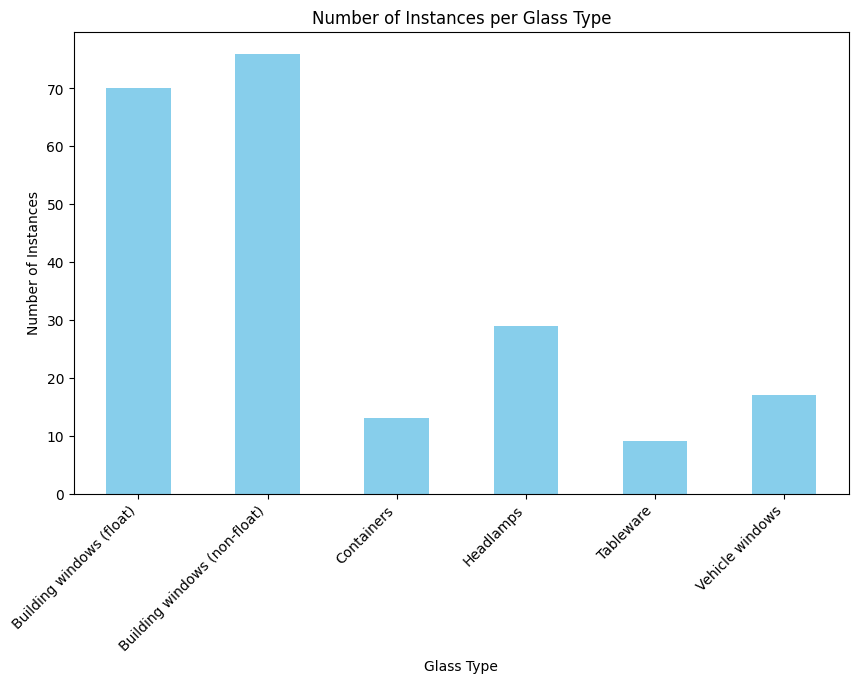

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y is a Pandas DataFrame with the column 'Type_of_glass'
# Create a mapping dictionary for the glass types
glass_type_mapping = {
    0: 'Building windows (float)',
    1: 'Building windows (non-float)',
    2: 'Vehicle windows',
    3: 'Containers',
    4: 'Tableware',
    5: 'Headlamps'
}


# Assuming 'Type_of_glass_encoded' is the column with encoded class labels
class_counts = y['Type_of_glass'].value_counts()

# Create a dictionary for reverse mapping from encoded labels to class names
reverse_mapping = {v: k for k, v in glass_type_mapping.items()}

# Map the encoded class labels to class names
class_labels = {key: glass_type_mapping[key] for key in class_counts.index}
class_counts.index = class_counts.index.map(class_labels)

# Plot the bar graph
plt.figure(figsize=(10, 6))
class_counts.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Glass Type')
plt.ylabel('Number of Instances')
plt.title('Number of Instances per Glass Type')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
import pandas as pd

# Assuming X is a DataFrame and y is a Series

# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

# Check for and remove duplicate rows in the combined DataFrame
df_cleaned = df.drop_duplicates()

# Split the cleaned DataFrame back into X and y
X_cleaned = df_cleaned.iloc[:, :-1]  # All columns except the last one
y_cleaned = df_cleaned.iloc[:, -1]   # The last column

# Optional: Reset index if needed
X_cleaned = X_cleaned.reset_index(drop=True)
y_cleaned = y_cleaned.reset_index(drop=True)

# Check if there are still duplicates
print(f"Number of duplicate rows in cleaned DataFrame: {df_cleaned.duplicated().sum()}")

Number of duplicate rows in cleaned DataFrame: 0


#####<font color='red'>Decision Trees: Do not require feature scaling or standardization because they are based on splitting the data according to feature values, which are invariant to scaling.</font>

In [ ]:
!pip install imbalanced-learn

In [ ]:
# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

# Check for missing values in the combined DataFrame
missing_values = df.isnull().sum()
print("Missing values in the combined DataFrame:")
print(missing_values[missing_values > 0])

Missing values in the combined DataFrame:
Series([], dtype: int64)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets (75% training, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(type(X_train))  # Should be <class 'numpy.ndarray'> or <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
print(X_train.shape)  # (num_samples_train, num_features)
print(y_train.shape)  # (num_samples_train,)
print(X_test.shape)   # (num_samples_test, num_features)
print(y_test.shape)   # (num_samples_test,)

(160, 9)
(160, 1)
(54, 9)
(54, 1)


In [ ]:
# Convert y_train, y_val, and y_test to 1D NumPy arrays
y_train = y_train.ravel()  # or y_train.squeeze()
y_test = y_test.ravel()    # or y_test.squeeze()

In [ ]:
#Handling the class imbalance problem
#SMOTE (Synthetic Minority Over-sampling Technique): Creates synthetic samples for the minority class.

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
import numpy as np

class CART(object):
    def __init__(self, criterion='gini', prune='depth', max_depth=4, min_criterion=0.05):
        # Initialize the Decision Tree parameters
        self.feature = None        # Index of the feature used for splitting
        self.label = None          # Class label or value for leaf nodes
        self.n_samples = None      # Number of samples in the node
        self.gain = None           # Information gain from the split
        self.left = None           # Left subtree
        self.right = None          # Right subtree
        self.threshold = None      # Threshold for splitting
        self.depth = 0             # Depth of the current node

        self.root = None           # Root node of the tree
        self.criterion = criterion # Criterion for splitting ('gini' or 'entropy')
        self.prune = prune         # Pruning method ('depth' or 'impurity')
        self.max_depth = max_depth # Maximum depth of the tree
        self.min_criterion = min_criterion # Minimum criterion for pruning

    def fit(self, features, target):
        # Fit the decision tree to the data
        self.root = CART(criterion=self.criterion, prune=self.prune, max_depth=self.max_depth, min_criterion=self.min_criterion)
        self.root._grow_tree(features, target, self.criterion)
        self.root._prune(self.prune, self.max_depth, self.min_criterion, self.root.n_samples)

    def predict(self, features):
        # Predict the class for each feature set
        return np.array([self.root._predict(f) for f in features])

    def print_tree(self):
        # Print the tree structure
        self.root._show_tree(0, ' ')

    def _grow_tree(self, features, target, criterion='gini'):
        # Grow the tree by splitting nodes based on the criterion
        self.n_samples = features.shape[0]

        # If only one class is present or max depth reached, set as leaf node
        if len(np.unique(target)) == 1 or self.depth >= self.max_depth:
            self.label = max([(c, len(target[target == c])) for c in np.unique(target)], key=lambda x: x[1])[0]
            return

        best_gain = 0.0
        best_feature = None
        best_threshold = None

        # Initialize label for the node
        self.label = max([(c, len(target[target == c])) for c in np.unique(target)], key=lambda x: x[1])[0]

        impurity_node = self._calc_impurity(criterion, target)

        # Iterate over all features and possible thresholds to find the best split
        for col in range(features.shape[1]):
            feature_level = np.unique(features[:, col])
            thresholds = (feature_level[:-1] + feature_level[1:]) / 2.0

            for threshold in thresholds:
                target_l = target[features[:, col] <= threshold]
                impurity_l = self._calc_impurity(criterion, target_l)
                n_l = float(target_l.shape[0]) / self.n_samples

                target_r = target[features[:, col] > threshold]
                impurity_r = self._calc_impurity(criterion, target_r)
                n_r = float(target_r.shape[0]) / self.n_samples

                impurity_gain = impurity_node - (n_l * impurity_l + n_r * impurity_r)
                if impurity_gain > best_gain:
                    best_gain = impurity_gain
                    best_feature = col
                    best_threshold = threshold

        if best_gain == 0:
            return

        self.feature = best_feature
        self.gain = best_gain
        self.threshold = best_threshold
        self._split_tree(features, target, criterion)


    def _split_tree(self, features, target, criterion):
        # Split the node into left and right subtrees
        features_l = features[features[:, self.feature] <= self.threshold]
        target_l = target[features[:, self.feature] <= self.threshold]
        self.left = CART(criterion=self.criterion, prune=self.prune, max_depth=self.max_depth, min_criterion=self.min_criterion)
        self.left.depth = self.depth + 1
        self.left._grow_tree(features_l, target_l, criterion)

        features_r = features[features[:, self.feature] > self.threshold]
        target_r = target[features[:, self.feature] > self.threshold]
        self.right = CART(criterion=self.criterion, prune=self.prune, max_depth=self.max_depth, min_criterion=self.min_criterion)
        self.right.depth = self.depth + 1
        self.right._grow_tree(features_r, target_r, criterion)

    def _calc_impurity(self, criterion, target):
        # Calculate the impurity of a node
        if criterion == 'gini':
            return 1.0 - sum([(float(len(target[target == c])) / float(target.shape[0])) ** 2.0 for c in np.unique(target)])

    def _prune(self, method, max_depth, min_criterion, n_samples):
        # Prune the tree based on the specified method
        if self.feature is None:
            return

        self.left._prune(method, max_depth, min_criterion, n_samples)
        self.right._prune(method, max_depth, min_criterion, n_samples)

        pruning = False

        if method == 'impurity' and self.left.feature is None and self.right.feature is None:
            if (self.gain * float(self.n_samples) / n_samples) < min_criterion:
                pruning = True
        elif method == 'depth' and self.depth >= max_depth:
            pruning is True

        if pruning is True:
            self.left = None
            self.right = None
            self.feature = None

    def _predict(self, d):
        # Predict the class for a single data point
        if self.feature is not None:
            if d[self.feature] <= self.threshold:
                return self.left._predict(d)
            else:
                return self.right._predict(d)
        else:
            return self.label

    def _show_tree(self, depth, cond):
        # Print the tree structure
        base = '    ' * depth + cond
        if self.feature is not None:
            print(base + 'if X[' + str(self.feature) + '] <= ' + str(self.threshold))
            self.left._show_tree(depth + 1, 'then ')
            self.right._show_tree(depth + 1, 'else ')
        else:
            print(base + '{value: ' + str(self.label) + ', samples: ' + str(self.n_samples) + '}')

In [ ]:
tree = CART(criterion = 'gini', prune = 'depth', max_depth = 3)

In [ ]:
tree.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Make predictions on the test set
y_test_pred = tree.predict(X_test)

Confusion Matrix:
[[12  0  1  1  0  0]
 [ 5  9  3  1  2  1]
 [ 3  0  1  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]

Classification Report:
                              precision    recall  f1-score   support

    Building windows (float)       0.60      0.86      0.71        14
Building windows (non-float)       0.90      0.43      0.58        21
             Vehicle windows       0.20      0.25      0.22         4
                  Containers       0.60      0.75      0.67         4
                   Tableware       0.60      1.00      0.75         3
                   Headlamps       0.89      1.00      0.94         8

                    accuracy                           0.67        54
                   macro avg       0.63      0.71      0.64        54
                weighted avg       0.73      0.67      0.66        54



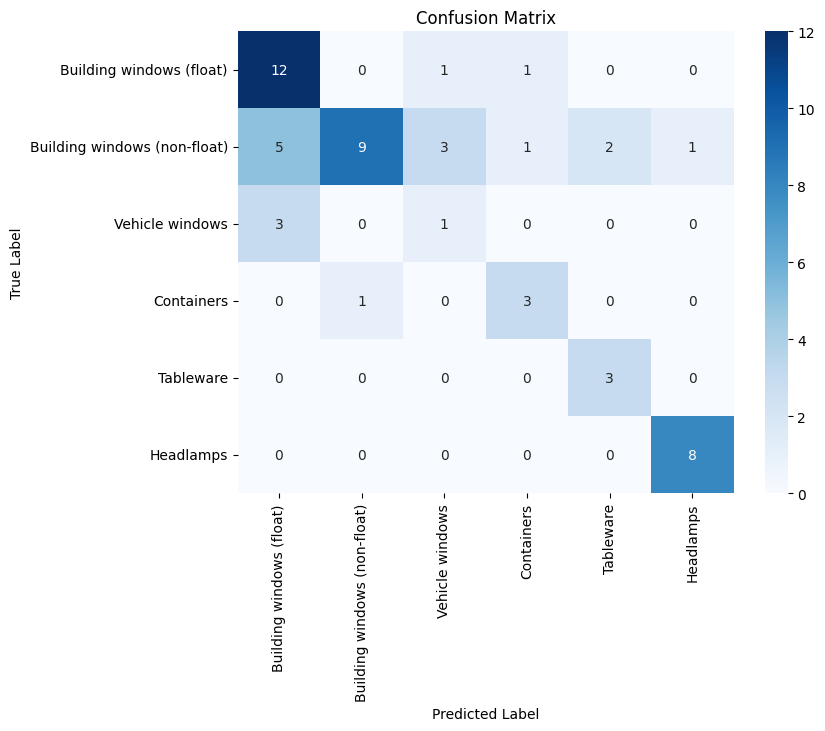

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Convert class labels to strings if they are numeric
class_names = ['Building windows (float)', 'Building windows (non-float)', 'Vehicle windows',
                'Containers', 'Tableware', 'Headlamps']  # Replace these with your actual class names

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=range(len(class_names)))

# Generate classification report
report = classification_report(y_test, y_test_pred, target_names=class_names)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(report)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


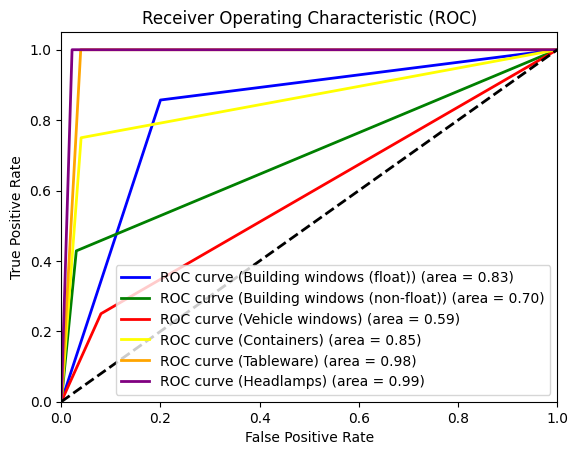

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test and y_test_pred are your test labels and predictions

# Binarize the output for ROC and Precision-Recall curves
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = label_binarize(y_test_pred, classes=np.unique(y_test_pred))
n_classes = y_test_binarized.shape[1]

# Define your class names (replace these with your actual class names)
class_names = ['Building windows (float)', 'Building windows (non-float)', 'Vehicle windows',
                'Containers', 'Tableware', 'Headlamps']
# ROC curve and ROC AUC score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'green', 'red', 'yellow','orange','purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve ({class_names[i]}) (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
tree.print_tree()

 if X[2] <= 2.7199999999999998
    then if X[1] <= 13.674839570019737
        then if X[0] <= 1.5232299999999999
            then if X[4] <= 74.05115262364063
                then {value: 3, samples: 54}
                else {value: 5, samples: 4}
            else {value: 1, samples: 5}
        else if X[7] <= 0.10796246236311899
            then if X[0] <= 1.5199449999999999
                then {value: 4, samples: 56}
                else if X[1] <= 14.645
                    then {value: 1, samples: 4}
                    else {value: 5, samples: 1}
            else if X[2] <= 2.6126572307282103
                then {value: 5, samples: 46}
                else {value: 3, samples: 2}
    else if X[6] <= 8.315000000000001
        then if X[2] <= 3.3023265974726415
            then {value: 5, samples: 4}
            else if X[3] <= 1.245
                then if X[0] <= 1.5178449999999999
                    then {value: 0, samples: 5}
                    else {value: 1, samples: 1}
   

###Cross Validation to findthe best value of the hyperparameter "Max Depth"

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def cross_validate_depth(depth, features, target, k_folds=5):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    accuracies = []

    for train_index, val_index in kf.split(features):
        X_train, X_val = features[train_index], features[val_index]
        y_train, y_val = target[train_index], target[val_index]

        # Initialize the CART tree with the given depth
        tree = CART(criterion = 'gini', prune = 'depth', max_depth = depth)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_val)

        # Compute accuracy or other metrics
        accuracy = accuracy_score(y_val, y_pred)
        accuracies.append(accuracy)

    return np.mean(accuracies)

In [ ]:
from sklearn.metrics import accuracy_score

depths = [2, 4, 6, 8, 10]  # Example range of depths
best_depth = None
best_score = 0

for depth in depths:
    score = cross_validate_depth(depth, X_train, y_train)
    print(f"Depth: {depth}, Score: {score}")

    if score > best_score:
        best_score = score
        best_depth = depth

print(f"Best Depth: {best_depth} with Score: {best_score}")

Depth: 2, Score: 0.5804653204565409
Depth: 4, Score: 0.8274363476733976
Depth: 6, Score: 0.8603160667251976
Depth: 8, Score: 0.8602721685689201
Depth: 10, Score: 0.8543020193151888
Best Depth: 6 with Score: 0.8603160667251976


In [ ]:
#DecisionTreeClassifier from ScikitLearn Library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Initialize the DecisionTreeClassifier
tree_sckit = DecisionTreeClassifier(max_depth=3, criterion='gini')

# Fit the model on the training data
tree_sckit.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_sckit = tree_sckit.predict(X_test)

Confusion Matrix:
[[12  0  1  1  0  0]
 [ 5  9  2  2  2  1]
 [ 3  0  1  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]

Classification Report:
                              precision    recall  f1-score   support

    Building windows (float)       0.60      0.86      0.71        14
Building windows (non-float)       1.00      0.43      0.60        21
             Vehicle windows       0.25      0.25      0.25         4
                  Containers       0.57      1.00      0.73         4
                   Tableware       0.60      1.00      0.75         3
                   Headlamps       0.89      1.00      0.94         8

                    accuracy                           0.69        54
                   macro avg       0.65      0.76      0.66        54
                weighted avg       0.77      0.69      0.67        54



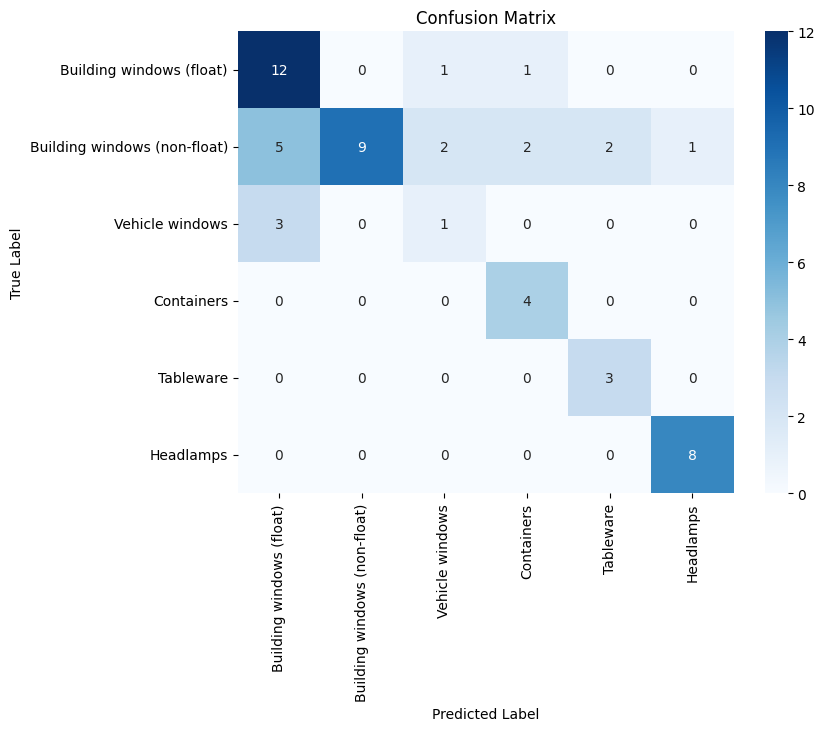

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred_sckit, labels=range(len(class_names)))

# Generate classification report
report = classification_report(y_test, y_test_pred_sckit, target_names=class_names)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(report)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


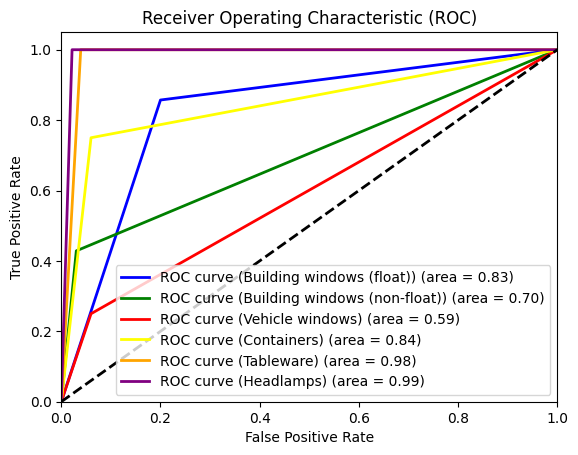

In [ ]:
# Binarize the output for ROC and Precision-Recall curves

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = label_binarize(y_test_pred_sckit, classes=np.unique(y_test_pred_sckit))
n_classes = y_test_binarized.shape[1]

# Define your class names (replace these with your actual class names)
class_names = ['Building windows (float)', 'Building windows (non-float)', 'Vehicle windows',
                'Containers', 'Tableware', 'Headlamps']
# ROC curve and ROC AUC score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'green', 'red', 'yellow','orange','purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve ({class_names[i]}) (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Define the parameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],  # Values of max_depth to try
}

In [ ]:
# Initialize the DecisionTreeClassifier
tree_sckit_grid = DecisionTreeClassifier(criterion='gini')

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=tree_sckit_grid, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data using grid search
grid_search.fit(X_train, y_train)

# Get the best model after grid search
best_tree = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_test_pred_sckit = best_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred_sckit)
print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
print(f"Accuracy: {accuracy:.2f}")

Best max_depth: 8
Accuracy: 0.69


The different result of hyperparameter tuning

Implementation Differences:

1. Handling Ties: Different methods for resolving ties in split decisions.
2. Stopping Criteria: Differences in stopping conditions affecting tree structure.

GridSearchCV Parameter Tuning:

1.Parameter Range: Ensure param_grid matches the range used in your custom implementation.
Cross-Validation: Verify that your custom implementation uses the same cross-validation as GridSearchCV.

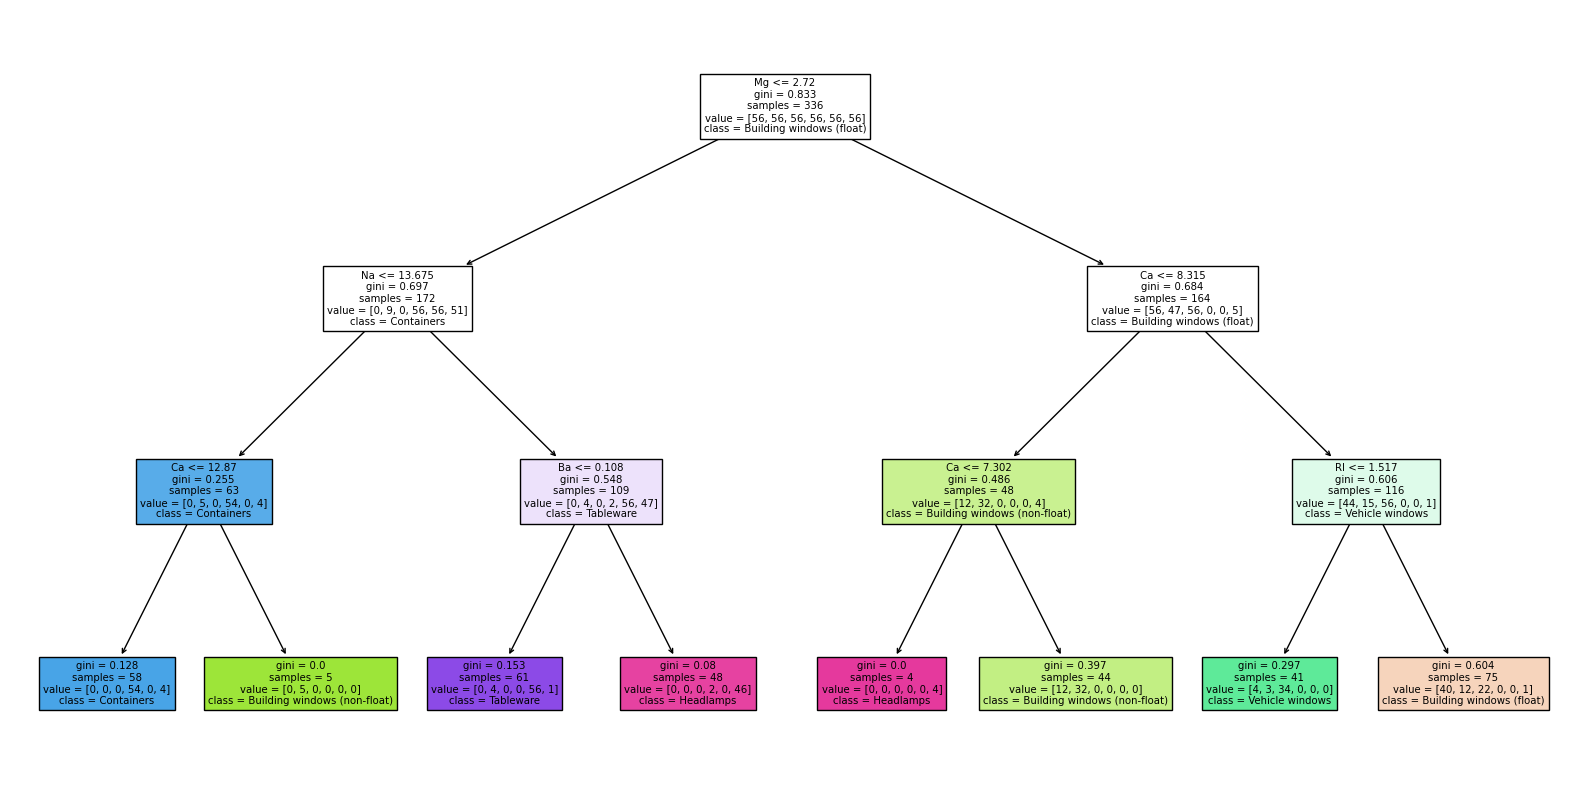

In [ ]:
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert X_train to a DataFrame with feature names
X_train_df = pd.DataFrame(X_train, columns=['RI', 'Na',	'Mg',	'Al',	'Si',	'K', 'Ca',	'Ba',	'Fe'])  # Replace with actual feature names

# Plot the decision tree
plt.figure(figsize=(20, 10))  # You can adjust the size as needed
plot_tree(tree_sckit, filled=True, feature_names=X_train_df.columns, class_names=['Building windows (float)', 'Building windows (non-float)', 'Vehicle windows',
                'Containers', 'Tableware', 'Headlamps'])  # Adjust class names accordingly
plt.show()

## **Lab Assignment 4**


<font color='blue'>Objective: </font>

In this assignment, you will load and preprocess the Auto MPG dataset, addressing issues such as duplicates and missing values. You will implement a decision tree regressor from scratch, using Mean Squared Error (MSE) reduction for node splitting and tuning hyperparameters (maximum depth and minimum samples in leaf) through K-fold cross-validation. You will compare your implementation with scikit-learn’s decision tree regressor by evaluating and contrasting their MSE performance and hyperparameter values. Additionally, you will visualize the results with scatter plots of predicted versus true MPG values and a decision tree diagram.

### <font color='blue'> Task - 1 [Marks 0] </font>:
Load and preprocess the Auto [MPG dataset](https://archive.ics.uci.edu/dataset/9/auto+mpg) - there are 7 features and the target variable is the MPG of the car. Note that car id (string) is not a feature.


In [ ]:
#Solution code

### <font color='blue'> Task - 2 [Marks 1] </font>:
:
1. Check for duplicate and missing features and handle such cases as necessary.  

2. Partition the data into training, and test sets (80%-20%).  

In [ ]:
# Solution code

### <font color='blue'> Task - 3 [Marks 6] </font>:
Implement a decision tree regressor from scratch, where the decision tree algorithm you create will use Mean Squared Error (MSE) reduction as the criterion for splitting nodes.

In [ ]:
# Solution code

### <font color='blue'> Task - 4 [Marks 4] </font>:

Treat the maximum depth of the tree and the minimum samples in leaf (same as scikit-learn's min_samples_leaf) as hyperparameters and find the best values of the hyperparmeters by performing K-fold cross validation with grid search on the 80% samples from the training set. You can use **KFold** for this purpose. Perform predictions on the test set using the learned decision tree regressor and report the MSE on the test set.


In [ ]:
# Solution code

### <font color='blue'> Task - 5 [Marks 3] </font>:

Fit the decision tree regressor model on the training set using scikit learn. Also, perform the cross validation and find the best values of the two hyperparameters in the same way as explained in case of the from scratch implementation.  

In [ ]:
# Solution code

### <font color='blue'> Task - 6 [Marks 2] </font>:
Compare whether the best hyperparameter values similar for *your* implementation and scikit-learn? Also, compare the MSE obtained by your implementation with that given by scikit-learn.

In [ ]:
# Solution code

### <font color='blue'> Task - 7 [Marks 2] </font>:
Show the scatter plots of predicted mpg vs. True mpg for both the from scratch implementation and scikit-learn's implementation of decision tree regressor.  

In [ ]:
# Solution ccode

### <font color='blue'> Task - 8 [Marks 2] </font>:
Show the visualization of the decision tree learned by scikit-learn.

In [ ]:
# solution code